# Solving ODEs in Python

we use "odeint" https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html

odeint is a function from the scipy.integrate module that can be used to numerically solve ordinary differential equations (ODEs). The function takes in three arguments:

\begin{equation}
scipy.integrate.odeint(func, y0, t, args=())
\end{equation}

where:

func: the function that defines the system of ODEs to be solved. This function should take in two arguments, a vector y of the state variables and the current time t, and return a vector of the time derivatives of the state variables.
y0: the initial state of the system, given as a list or array.
t: a sequence of time values for which to solve the ODEs.
args: additional arguments to be passed to the func function.

# First Order ODE

Let's try a first-order ordinary differential equation (ODE), say:

\begin{equation}
y'+y=x,  y(0)=1
\end{equation}

This has a closed-form solution 
\begin{equation}
y=x−1+2e−x)
\end{equation}

We are going to solve this numerically.

In [1]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

# Define a function which calculates the derivative
def dy_dx(y, x):
    return x - y

xs = np.linspace(0,5,100)
y0 = 1.0  # the initial condition
ys = odeint(dy_dx, y0, xs)
ys = np.array(ys).flatten()

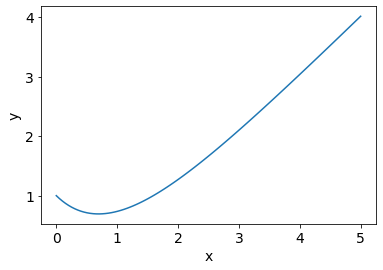

In [3]:
# Plot the numerical solution
plt.rcParams.update({'font.size': 14})  # increase the font size
plt.xlabel("x")
plt.ylabel("y")
plt.plot(xs, ys, label='numerical')

Compare the numerical solution with the analytical solution by showing both on the same plot

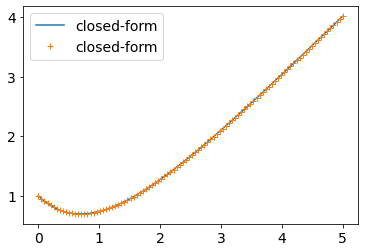

In [4]:
y_exact = xs - 1 + 2*np.exp(-xs)
plt.plot(xs, ys, xs, y_exact, "+", label='closed-form')
plt.legend()

Now take a look at the difference between the two series:

In [5]:
y_difference = ys - y_exact

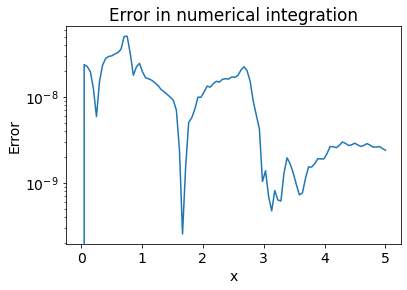

In [6]:
y_diff = np.abs(y_exact - ys)
plt.semilogy(xs, y_diff)
plt.ylabel("Error")
plt.xlabel("x")
plt.title("Error in numerical integration");
# Note the logarithmic scale on the y-axis. 

# Solving a System of ODEs

Equation: 
\begin{equation}
2 \frac{dx}{dt} = -x(t)+u(t) \tag{1}
\end{equation}

\begin{equation}
5 \frac{dy}{dt} = -y(t) + x(t) \tag{2}
\end{equation}

\begin{equation}
u(t) = S(t-5), x(0)=y(0)=0
\end{equation}

where $u(t)$ is a step function that changes from 0 to 5 at t=5.

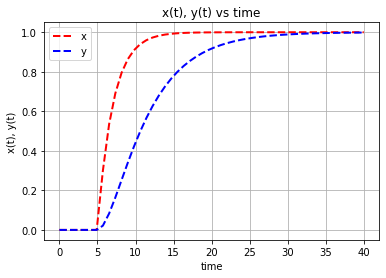

In [2]:
#This exercise can easily be extended for two variables or more.
#Using similar steps from previous code block

#Let z = [x,y]
#u is the input.
def model(z,t):
  """
  Model returns the derivative of z.
  Arguments: z, t
  Returns: dz [x_dot, y_dot]
  """
  x = z[0]
  y = z[1]
  if t >= 5: u = 1
  else: u = 0
  dx = (-x + u)/2
  dy = (-y + x)/5

  return [dx,dy]

#Initial condition
x0 =y0 = 0 

#Time points
t = np.linspace(0,40)

#Solving ode
soln = odeint(model, [x0,y0], t)
#soln [x,y]

#plotting results
fig = plt.figure()
plt.plot(t, soln[:,0], 'r--', linewidth=2, label='x')
plt.plot(t, soln[:,1], 'b--', linewidth=2, label='y')
plt.xlabel('time')
plt.ylabel('x(t), y(t)')

plt.legend()
plt.grid(True)
plt.title('x(t), y(t) vs time')
plt.show()

# Second-order ODE
Suppose we have a second-order ODE such as a damped simple harmonic motion equation,

\begin{equation}
y′′+2y′+2y=cos(2x),  y(0)=0,  y′(0)=0
\end{equation}
 
We can turn this into two first-order equations by defining a new depedent variable. For example,

\begin{equation}
 z=y′  ⇒  z′+2z+2y=cos(2x),  z(0)=y(0)=0.
\end{equation}
 
We can solve this system of ODEs using "odeint" with lists, as follows:

In [9]:
def U_derivative(U, x):
    # Here U is a vector such that y = U[0] and z = U[1]. This function should return [y', y'']
    return [U[1], -2*U[1] - 2*U[0] + np.cos(2*x)]

U0 = [0, 0]
xs = np.linspace(0, 10, 200)
Us = odeint(U_derivative, U0, xs)
# Us is the solution of the U_derivative, y = Us[:,0] and y' = Us[:,1]
ys = Us[:,0]

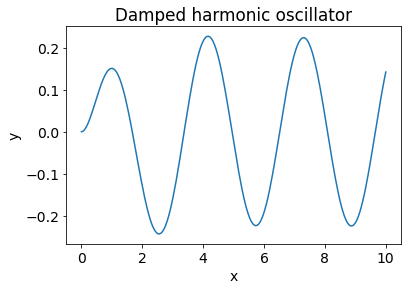

In [10]:
plt.xlabel("x")
plt.ylabel("y")
plt.title("Damped harmonic oscillator")
plt.plot(xs,ys);

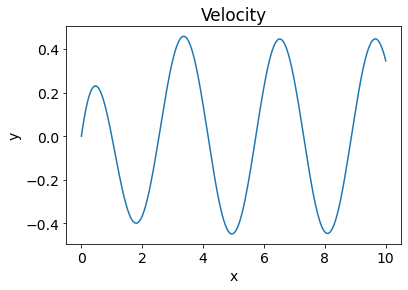

In [17]:
vel = Us[:,1]
plt.xlabel("x")
plt.ylabel("y")
plt.title("Velocity")
plt.plot(xs,vel);

In [18]:
U_derivative(Us, xs)

ValueError: operands could not be broadcast together with shapes (2,) (200,) 

In [13]:
_,acc = U_derivative(Us, xs)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Accelation")
plt.plot(xs,acc);

ValueError: operands could not be broadcast together with shapes (2,) (200,) 

# Mixed ODE - A pair of First-order Non-linear ODE

Predator-Prey Equations

Also known as Lotka-Volterra equations, the predator-prey equations are a pair of first-order non-linear ordinary differential equations. They represent a simplified model of the change in populations of two species which interact via predation. For example, foxes (predators) and rabbits (prey). Let  x  and  y  represent rabbit and fox populations, respectively. Then

\begin{equation}
 dxdt=x(a−by)
\end{equation}

\begin{equation}
 dydt=−y(c−dx)
\end{equation}
 
Here  a ,  b ,  c  and  d  are parameters, which are assumed to be positive.

In [16]:
a,b,c,d = 1,1,1,1

def dP_dt(P, t):
    return [P[0]*(a - b*P[1]), -P[1]*(c - d*P[0])]

ts = np.linspace(0, 12, 100)
P0 = [1.5, 1.0]
Ps = odeint(dP_dt, P0, ts)
prey = Ps[:,0]
predators = Ps[:,1]

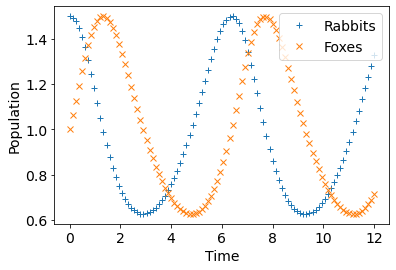

In [17]:
plt.plot(ts, prey, "+", label="Rabbits")
plt.plot(ts, predators, "x", label="Foxes")
plt.xlabel("Time")
plt.ylabel("Population")
plt.legend();

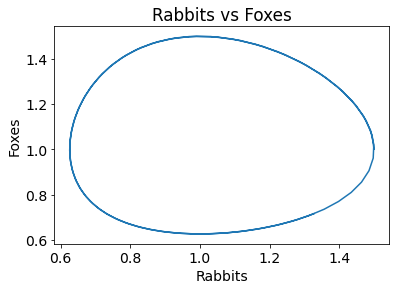

In [18]:
plt.plot(prey, predators, "-")
plt.xlabel("Rabbits")
plt.ylabel("Foxes")
plt.title("Rabbits vs Foxes");

The plot above illustrates that the system is periodic. Let's plot a few more curves in the phase space.

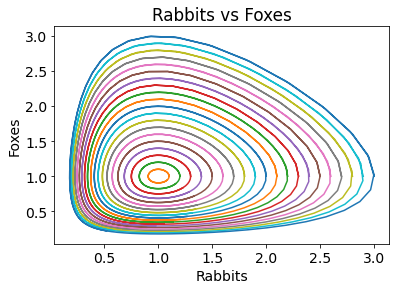

In [19]:
ic = np.linspace(1.0, 3.0, 21)
for r in ic:
    P0 = [r, 1.0]
    Ps = odeint(dP_dt, P0, ts)
    plt.plot(Ps[:,0], Ps[:,1], "-")
plt.xlabel("Rabbits")
plt.ylabel("Foxes")
plt.title("Rabbits vs Foxes");

# a system of second order ODEs

To solve a system of second-order Ordinary Differential Equations (ODEs) in Python with odeint, you can first convert the system of second-order ODEs into a system of first-order ODEs by introducing new variables. Then, you can use the odeint function from the scipy.integrate module to solve the resulting system of first-order ODEs. Let's see an example below.


In this example, the system of ODEs describes the position and velocity of a damped harmonic oscillator driven by a sinusoidal force. The system is governed by the following equations:

\begin{equation}
y1'' + 2gammay1' + omega**2y1 = Asin(F_{0}t)
\end{equation}

\begin{equation}
y2'' + 2gammay2' + omega**2y1 = -AF_{0}cos(F_{0}t)
\end{equation}

where y1 is the position of the oscillator, y2 is its velocity, omega is the natural frequency of the oscillator, gamma is the damping coefficient, A is the amplitude of the driving force, and F0 is its frequency.

In [22]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define the system of second-order ODEs
def system(y, t, omega, gamma, A, F0):
    y1, y2 = y
    dydt = [y2, -omega**2*y1 - 2*gamma*y2 + A*np.sin(F0*t)]
    return dydt

# Parameters
omega = 2*np.pi
gamma = 0.5
A = 1.0
F0 = 0.1

# Initial conditions
y0 = [0.0, 0.0]

# Time points
t = np.linspace(0, 20, 1001)

# Solve the system of second-order ODEs
sol = odeint(system, y0, t, args=(omega, gamma, A, F0))

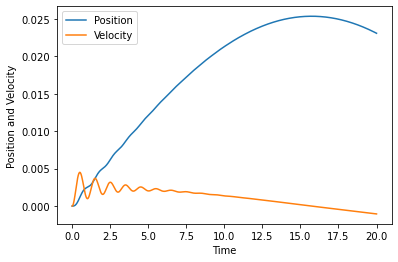

In [23]:
# Extract the solutions for each variable
y1 = sol[:, 0]
y2 = sol[:, 1]

# Plot the solutions
plt.plot(t, y1, label='Position')
plt.plot(t, y2, label='Velocity')
plt.xlabel('Time')
plt.ylabel('Position and Velocity')
plt.legend()
plt.show()

